BERLIANA ANDRA ARIANTI

##Program Dicoding

In [101]:
#library
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

import os

from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
import zipfile
from zipfile import ZipFile
#Ekstrak data 
file = 'drive/MyDrive/rockpaperscissors.zip'
zip = zipfile.ZipFile(file,'r')
zip.extractall('/content')
zip.close()

In [103]:
#Jumlah data
data = os.path.join('/content/rockpaperscissors/rps-cv-images')
rock = os.path.join('/content/rockpaperscissors/rock')
paper = os.path.join('/content/rockpaperscissors/paper')
scissors = os.path.join('/content/rockpaperscissors/scissors')

print('all data value :', len(os.listdir(data)))
print('rock value :', len(os.listdir(rock)))
print('paper value :', len(os.listdir(paper)))
print('scissors value :', len(os.listdir(scissors)))

all data value : 4
rock value : 726
paper value : 712
scissors value : 750


In [104]:
#Cek File
img_rock = os.listdir(rock)
print("Rock Image :", img_rock[:5])
img_paper = os.listdir(paper)
print("Paper Paper :", img_paper[:5])
img_scissors = os.listdir(scissors)
print("Scissors Image :", img_scissors[:5])

Rock Image : ['yC1FoVJ7cUxIEfBc.png', 'wZikdISRLJlJwp9q.png', '5uXiqEc4q2Vi0NCX.png', 'zM2n6u50gHzL1i6i.png', 'hMqKoUYAvB91YRuO.png']
Paper Paper : ['C5LDaiOquQm9mDVH.png', 'SoqluLecSTBcuyoS.png', 'eiiwN1DsKoIheMgz.png', 'TstngIvuLJt0GIze.png', 'cMbbpVIgFU95R4tO.png']
Scissors Image : ['inP9wrbC4x26yBW9.png', 'xgFgqnPJIU3u1ZqY.png', 'TJUiCdN9LUl2xPSE.png', 'sUi91SccB2jXsjyd.png', 'uQLROCDZVtwVCXfm.png']


In [105]:
#Split Data
train_r, val_r = train_test_split(os.listdir(rock), test_size=0.2)
train_p, val_p = train_test_split(os.listdir(paper), test_size=0.2)
train_s, val_s = train_test_split(os.listdir(scissors), test_size=0.2)
train, val = train_test_split(os.listdir(data), test_size=0.2)

In [106]:
#Image data generator
DATA = '/content/rockpaperscissors/rps-cv-images' #main folder

train_imggen = ImageDataGenerator(
      rescale = 1./225,
      rotation_range = 40,
      horizontal_flip = True,
      shear_range = 0.2,
      fill_mode = 'nearest',
      validation_split = 0.4)
test_imggen = ImageDataGenerator(
      rescale = 1./225,
      rotation_range = 20,
      horizontal_flip = True,
      shear_range = 0.2,
      fill_mode = 'nearest')

In [107]:
train_gen = train_imggen.flow_from_directory(
    DATA,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle=True,
    subset='training')

val_gen = train_imggen.flow_from_directory(
    DATA,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle=True,
    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [108]:
#CNN Model
modelCNN = tf.keras.models.Sequential([
            #Layer 1
            tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
            tf.keras.layers.MaxPooling2D(2,2),
            #Layer 2
            tf.keras.layers.Conv2D(65, (3,3), activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            #Layer 3
            tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            #Layer 4
            tf.keras.layers.Conv2D(256, (3,3), activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            #Fully Connected
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation = 'relu'),
            tf.keras.layers.Dense(3, activation= 'softmax')
])

In [109]:
modelCNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 72, 72, 65)        18785     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 65)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 34, 34, 128)       75008     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 17, 17, 128)     

In [110]:
modelCNN.compile(loss = 'categorical_crossentropy',
                 optimizer = 'rmsprop',
                 metrics = ['accuracy'])

In [111]:
#melatih model CNN
latih = modelCNN.fit(
    train_gen,
    steps_per_epoch = 4,
    epochs = 25,
    validation_data = val_gen,
    validation_steps = 4,
    verbose = 2
)

Epoch 1/25
4/4 - 12s - loss: 3.2026 - accuracy: 0.3828 - val_loss: 1.0993 - val_accuracy: 0.2969 - 12s/epoch - 3s/step
Epoch 2/25
4/4 - 11s - loss: 1.1056 - accuracy: 0.4297 - val_loss: 1.1612 - val_accuracy: 0.3203 - 11s/epoch - 3s/step
Epoch 3/25
4/4 - 11s - loss: 1.0990 - accuracy: 0.4375 - val_loss: 1.1967 - val_accuracy: 0.3125 - 11s/epoch - 3s/step
Epoch 4/25
4/4 - 11s - loss: 1.1916 - accuracy: 0.3438 - val_loss: 1.0884 - val_accuracy: 0.3672 - 11s/epoch - 3s/step
Epoch 5/25
4/4 - 11s - loss: 1.0936 - accuracy: 0.3594 - val_loss: 1.0512 - val_accuracy: 0.6484 - 11s/epoch - 3s/step
Epoch 6/25
4/4 - 11s - loss: 1.0289 - accuracy: 0.5000 - val_loss: 0.9669 - val_accuracy: 0.7109 - 11s/epoch - 3s/step
Epoch 7/25
4/4 - 11s - loss: 1.0551 - accuracy: 0.4844 - val_loss: 0.9932 - val_accuracy: 0.5312 - 11s/epoch - 3s/step
Epoch 8/25
4/4 - 11s - loss: 1.0388 - accuracy: 0.4375 - val_loss: 0.9979 - val_accuracy: 0.5078 - 11s/epoch - 3s/step
Epoch 9/25
4/4 - 11s - loss: 1.0075 - accuracy: 

Saving 0Og76sl5CJhbxWWx.png to 0Og76sl5CJhbxWWx (2).png
0Og76sl5CJhbxWWx.png
PAPER


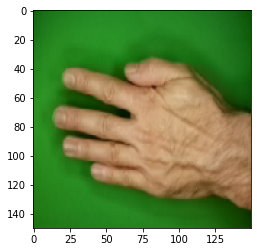

In [121]:
#Uji Coba Tebak Gambar
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt  

uploaded = files.upload()

#Upload gambar
for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))                              
  imgplot = plt.imshow(img)                                                     
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = modelCNN.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('PAPER')                                
  elif classes[0][1]==1:
    print('ROCK')                                   
  elif classes[0][2]==1:
    print('SCISSORS') 
  else :                               
    print('Tidak Diketahui')    